# Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

*Federico Medina A01721441*

Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado. 


- Dataset utilizado: https://www.kaggle.com/datasets/bhuviranga/co2-emissions?select=CO2+Emissions.csv
- Modelo a implementar: Regresión Lineal

El dataframe utilizado habla sobre cuánto Dioxido de Carbono un automovil suelta dependiendo de las diferentes variables que lo conforman. En este caso, obtenemos un dataframe que contiene:
- **Make**: la marca del carro
- **Model**: el nombre del auto
- **Vehicle Class**: el tipo de carro
- **Engine Size (L)**: el tamaño en litros del motor
- **Cylinders**: la cantidad de cilindros que tiene
- **Transmission**: el tipo de transmisión
- **Fuel Type**: qué tipo de gasolina utiliza
- **Fuel Consumption City (L/100 km)**: la cantidad de gasolina que utiliza en una ciudad en 100km.
- **Fuel Consumption Hwy (L/100 km)**: la cantidad de gasolina que utiliza en una carretera en 100km.
- **Fuel Consumption Comb (L/100 km)**: el promedio de gasolina que utilzia contando la ciudad y la carretera en 100km.
- **CO2 Emissions(g/km)**: la cantidad de gramos de CO2 que produce cada km.

En total se cuenta con 7385 registros y se busca utilizar las variables anteriores para poder predecir la última variable (CO2 Emissions(g/km)). La variable objetivo cuenta con una salida de valores enteros los cuales representan la cantidad de gramos de CO2 que se emite cada km.

#### Librerias Utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

#### Lectura de Datos

In [2]:
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Descripción de los Datos

In [3]:
df.describe() #Observamos la descripción de los datos del dataframe

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [4]:
df.isnull().sum() #buscamos si hay algún valor nulo en la base de datos, sin embargo, no se encuentra ninguno por lo que la base está completa

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

#### Análisis de Datos

In [5]:
#Eliminamos las columnas que no se considerarán para el análisis

df = df.drop(columns=["Model", "Make", "Vehicle Class", "Transmission", "Fuel Type"])

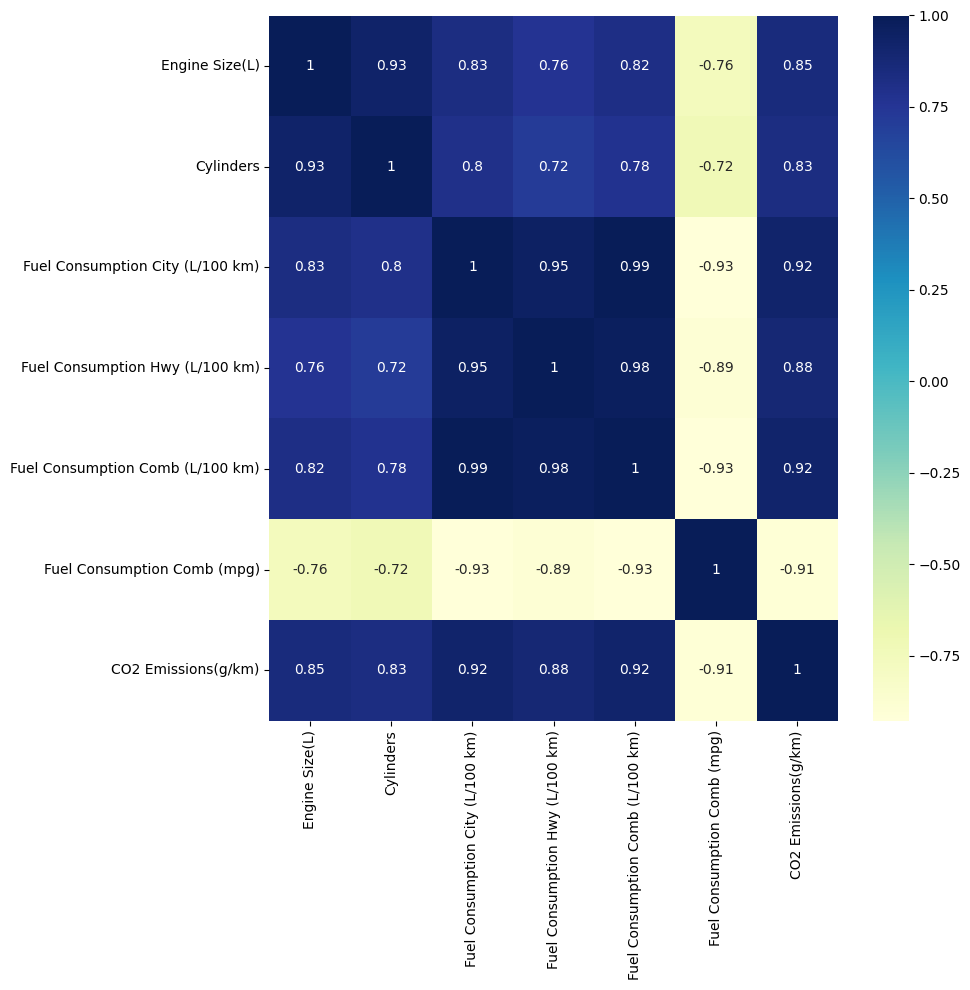

In [6]:
# Gráficar un heatmap de correlación

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

Lo que se busca es encontrar qué variables tienen relación lineal con la variable de CO2 Emissions para ver cuales causan la contaminación vehicular. Sin embargo, podemos observar en el heatmap que todas las variables tienen una alta correlación con dicha variable, por lo que se hará una gráfica para cada una y luego se elegirá la variable que se utilizará.

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Engine Size(L)'>

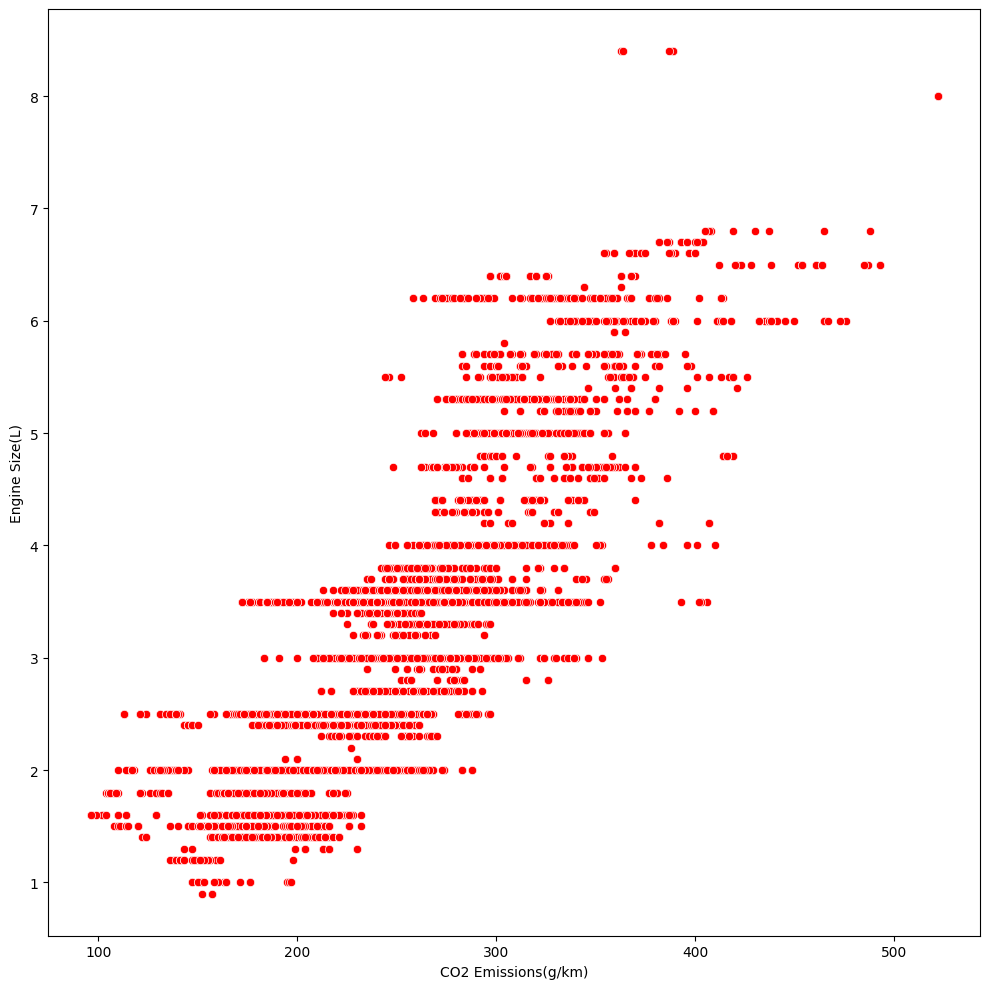

In [7]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Engine Size(L)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>

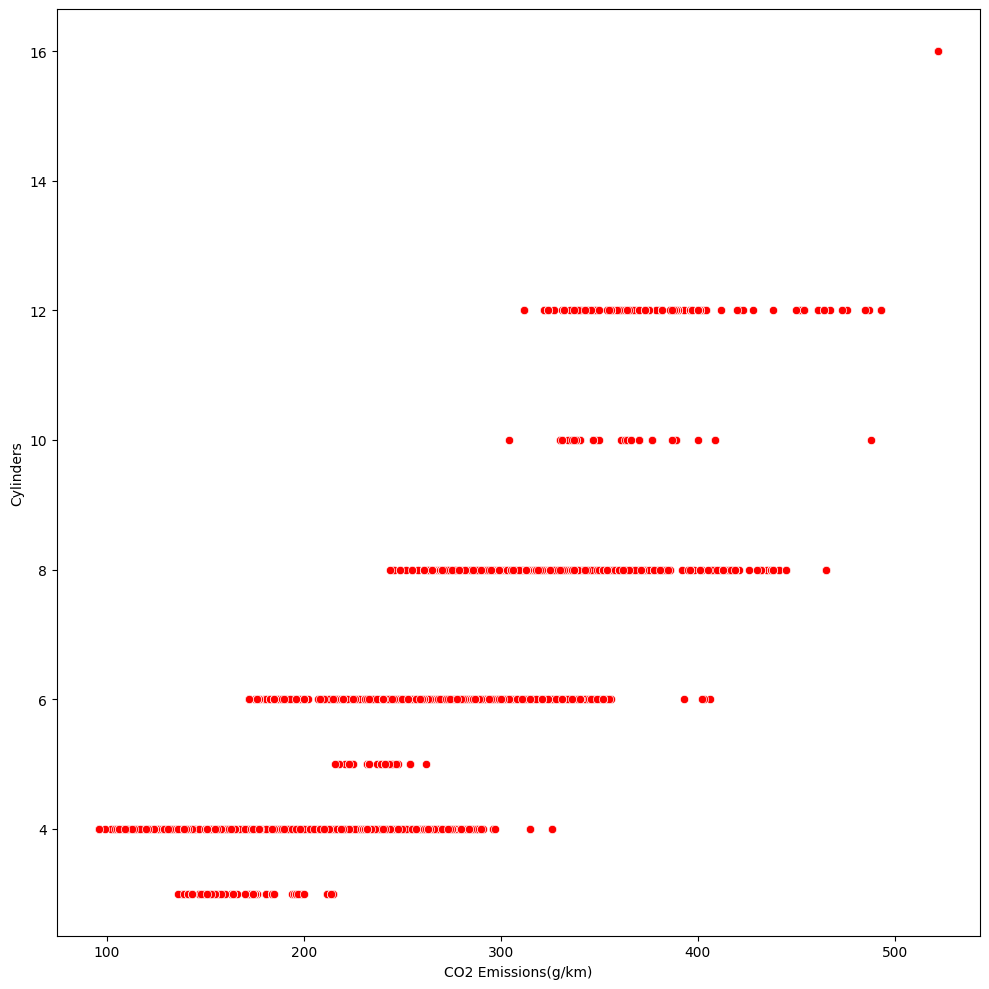

In [8]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Cylinders'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption City (L/100 km)'>

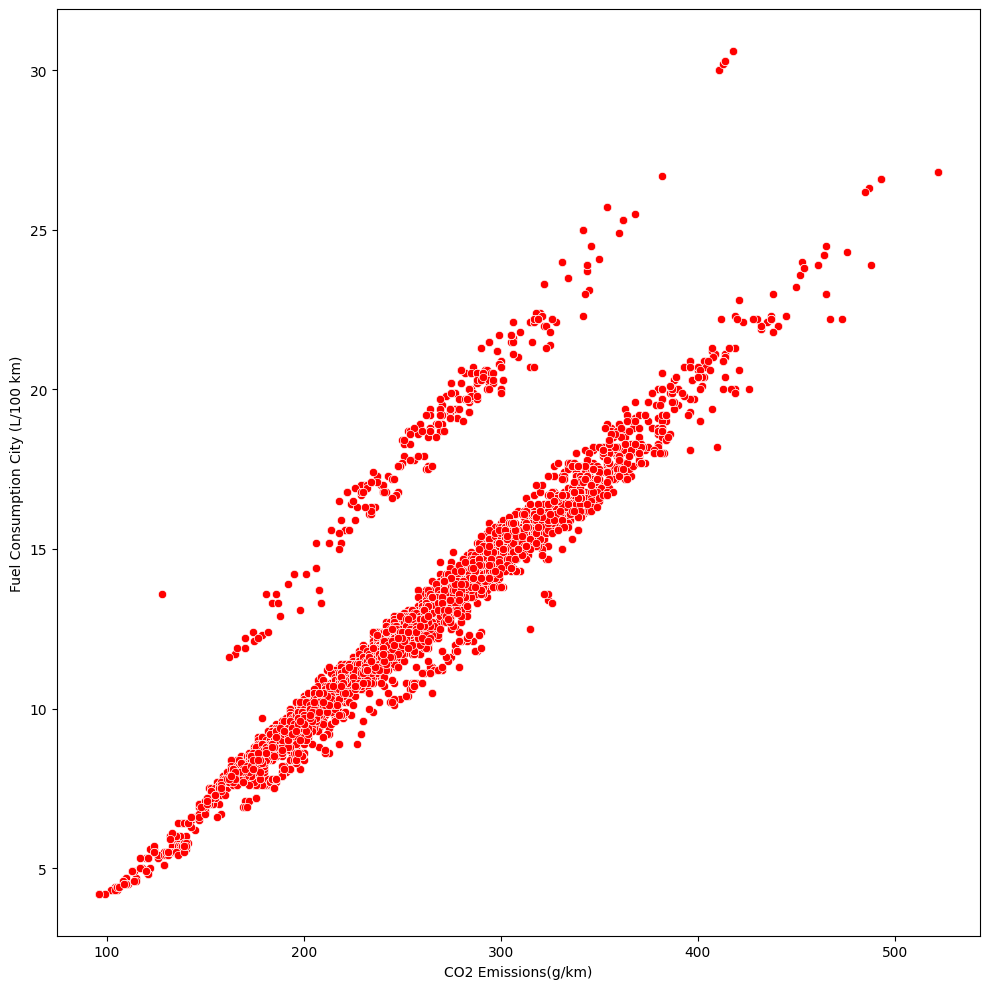

In [9]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption City (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Hwy (L/100 km)'>

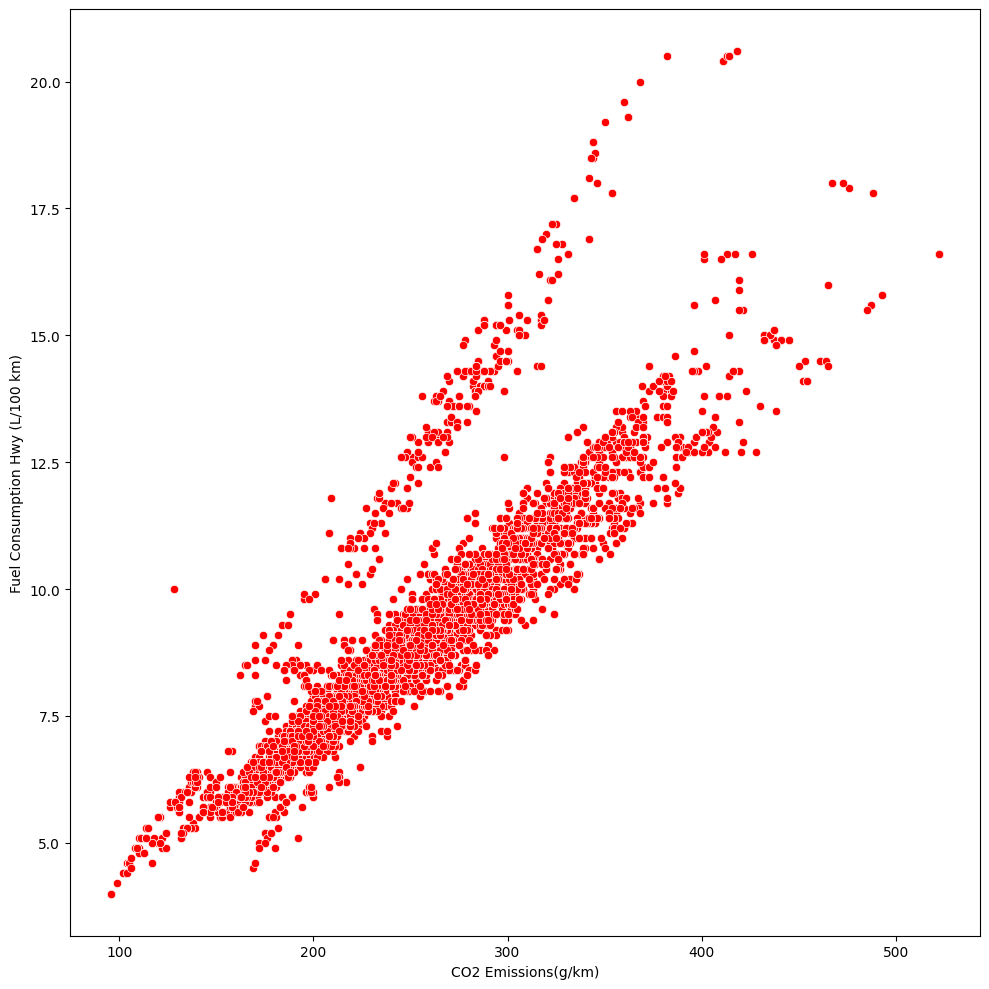

In [10]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Hwy (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (L/100 km)'>

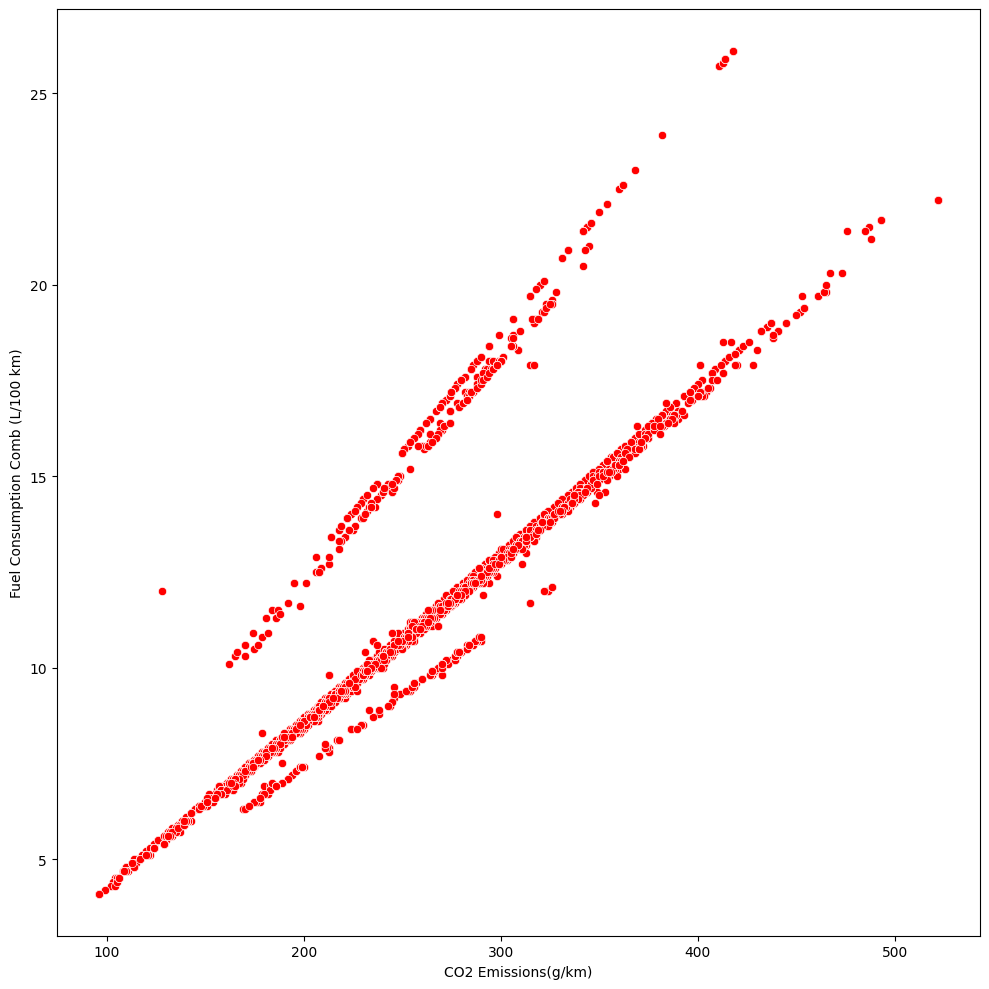

In [11]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Comb (L/100 km)'], color='red', marker='o')

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Fuel Consumption Comb (mpg)'>

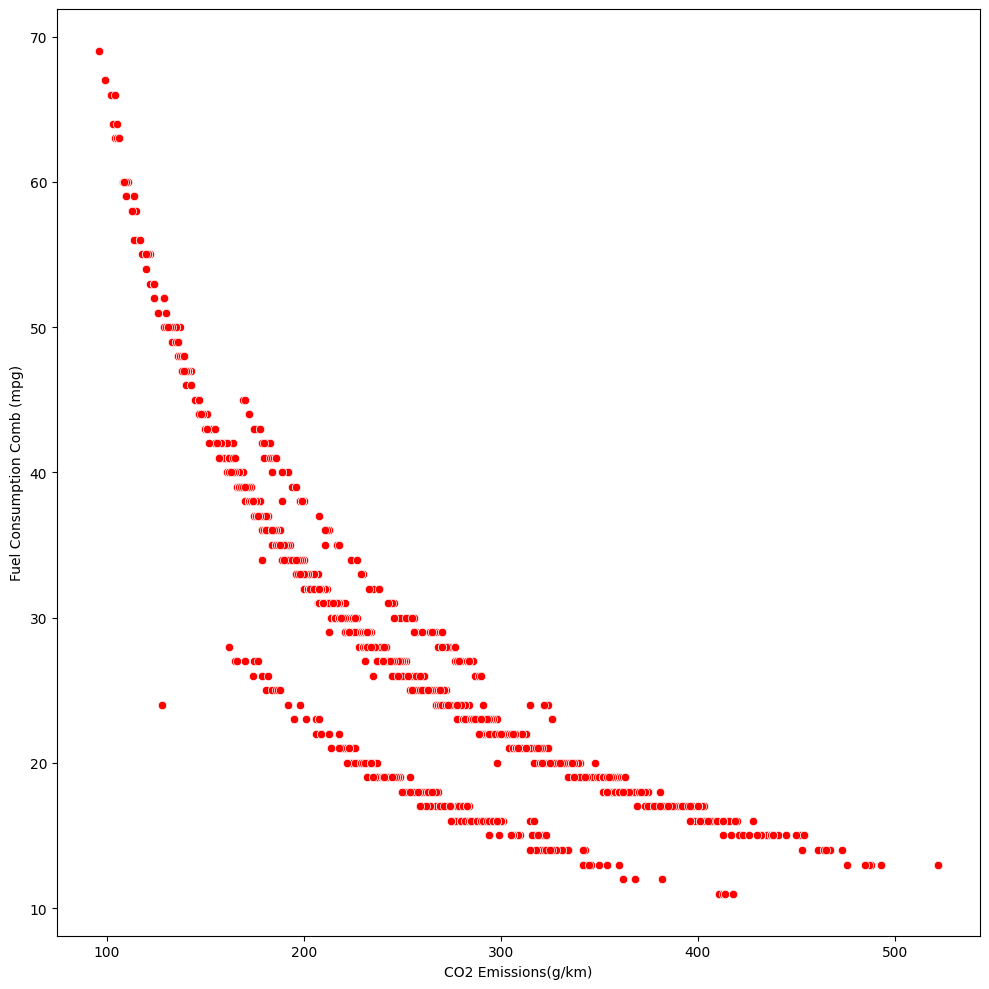

In [12]:
sns.scatterplot(x=df['CO2 Emissions(g/km)'], y=df['Fuel Consumption Comb (mpg)'], color='red', marker='o')

Observando las gráficas se tomó la decisión de utilizar la variable de Engine Size (L) para compararla con la variable CO2 Emissions (g/km).

#### Creación del Modelo de Regresión Lineal

In [13]:
# Crear lista con los hiper-parámetros iniciales (thetas)
theta = [1, 1]

# Cargar el valor del learning rate (alpha) = 0.0001
alpha = 0.0001

# Agarrar datos de entrenamiento y prueba
entrenamiento = df[0:int(len(df)*0.8)]
prueba = df[int(len(df)*0.8):len(df)]

# Se definen las variables x y y
x_train = entrenamiento['Engine Size(L)']
y_train = entrenamiento['CO2 Emissions(g/km)']

x_test = prueba['Engine Size(L)']
y_test = prueba['CO2 Emissions(g/km)']


In [15]:
# Creación de función de hipótesis
def _lambda(list: theta, n, x, y):

    h_theta = []
    delta_theta = []
    suma_delta_theta0 = 0
    suma_delta_theta1 = 0
   
    for i in range(n):
        h_theta.append(theta[0] + theta[1]*x[i])
        delta_theta_0 = (1/n)*(h_theta[i] - y[i])
        delta_theta_1 = (1/n)*((h_theta[i] - y[i])*x[i])
        suma_delta_theta0 += delta_theta_0
        suma_delta_theta1 += delta_theta_1
    
    return suma_delta_theta0, suma_delta_theta1


In [16]:
#definimos el numero de iteraciones

iteraciones = 1000
# Calcular el total de muestras a partir de los datos (n)
n = len(x_train)

for i in range(iteraciones):
    # Calcular delta para theta y para cada muestra
    delta_theta0, delta_theta1 = _lambda(theta, n, x_train, y_train)
    delta_theta0, delta_theta1

    # Actualizar theta0
    theta_0 = theta[0] - alpha*delta_theta0

    # Actualizar theta1
    theta_1 = theta[1] - alpha*delta_theta1

    theta = [theta_0, theta_1]

theta

[15.60701692599238, 48.78397517833269]

Observando los resultados anteriores, concluimos con los valores de theta con 1000 iteraciones y un alpha de 0.0001 es de [15.60701, 48.78397]

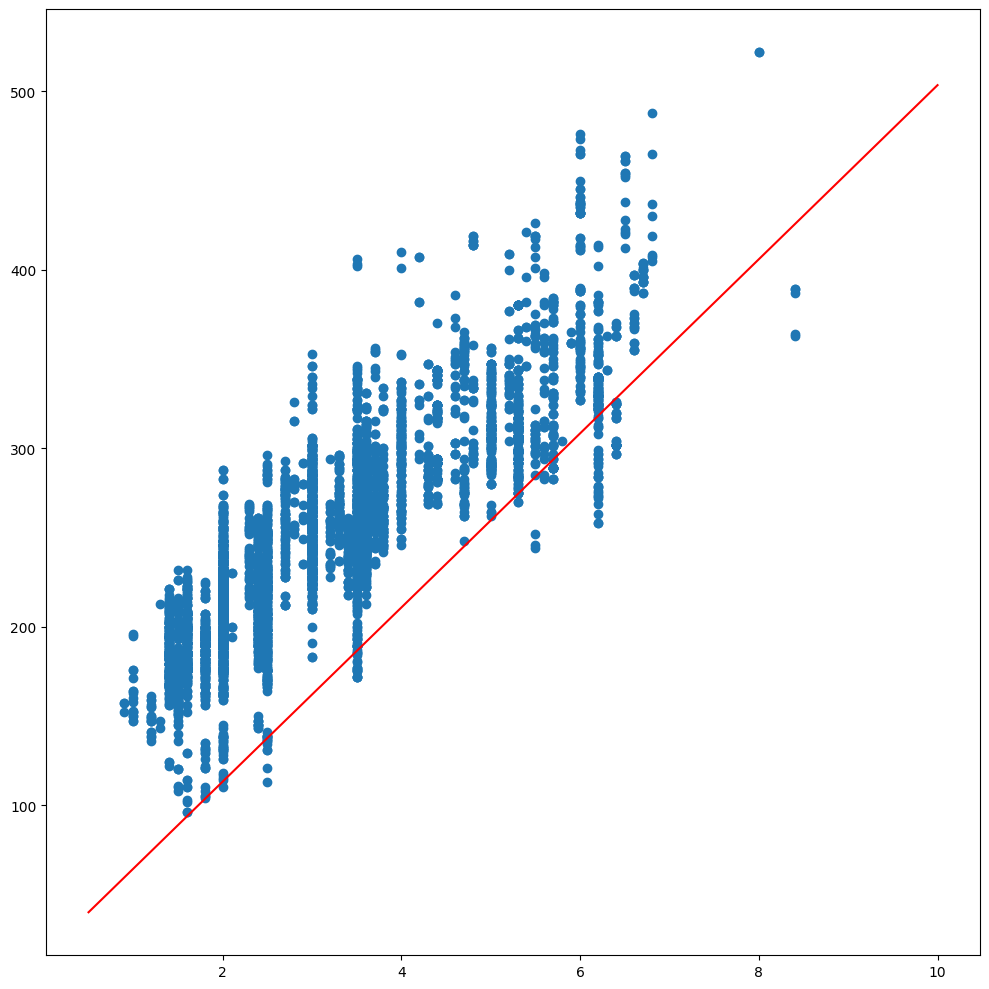

In [17]:
def f(x):
   return 15.60701692599238 + 48.7839751783326*x

x = np.linspace(0.5, 10, 10)

plt.scatter(x=x_train, y=y_train)
plt.plot(x, f(x), color='red')

plt.show()

#### Métricas de desempeño

In [18]:
def modeloImplementado(x):
    
    y_pred = []
    x = x.sort_values()
    for i in range(len(x)):
        y_pred.append(15.60701692599238 + 48.7839751783326*(x[i]))

    return y_pred

In [19]:
# Métricas de desempeño

y_train = y_train.sort_values()

y_pred = modeloImplementado(x_train)
MAE = 0
MSE = 0

for i in range(len(y_train)):

    # MAE: Error Medio Absoluto
    MAE += (1/len(y_train)) * abs(y_train[i] - y_pred[i])

    # MSE: Error Medio Cuadrado
    MSE += (1/len(y_train)) *  (y_train[i] - y_pred[i])**2


print('Error Medio Cuadrado = ', MSE)
print('Error Medio Absoluto = ', MAE)

Error Medio Cuadrado =  7591.564490534779
Error Medio Absoluto =  80.6711986965494


Observando las métricas obtenidas, vemos que el modelo no es ideal ya que contiene un error muy alto.

#### Evaluación del Modelo utilizando el Dataset de Entrenamiento

Ahora para hacer predicciones agarraremos tres valores alazar del dataframe de prueba, los cuales tienen los siguientes valores:

- 1.8 para el Engine Size y 181 para CO2 Emissions
- 1.5 para Engine Size y 114 para CO2 Emissions
- 3.5 para Engine Size y 252 para CO2 Emissions

In [20]:
print(entrenamiento.iloc[0], '\n')
print(entrenamiento.iloc[1], '\n')
print(entrenamiento.iloc[2], '\n')

Engine Size(L)                        2.0
Cylinders                             4.0
Fuel Consumption City (L/100 km)      9.9
Fuel Consumption Hwy (L/100 km)       6.7
Fuel Consumption Comb (L/100 km)      8.5
Fuel Consumption Comb (mpg)          33.0
CO2 Emissions(g/km)                 196.0
Name: 0, dtype: float64 

Engine Size(L)                        2.4
Cylinders                             4.0
Fuel Consumption City (L/100 km)     11.2
Fuel Consumption Hwy (L/100 km)       7.7
Fuel Consumption Comb (L/100 km)      9.6
Fuel Consumption Comb (mpg)          29.0
CO2 Emissions(g/km)                 221.0
Name: 1, dtype: float64 

Engine Size(L)                        1.5
Cylinders                             4.0
Fuel Consumption City (L/100 km)      6.0
Fuel Consumption Hwy (L/100 km)       5.8
Fuel Consumption Comb (L/100 km)      5.9
Fuel Consumption Comb (mpg)          48.0
CO2 Emissions(g/km)                 136.0
Name: 2, dtype: float64 



In [21]:
entrenamiento1 = theta[0] + theta[1]*2
entrenamiento2 = theta[0] + theta[1]*2.4
entrenamiento3 = theta[0] + theta[1]*1.5

print('entrenamiento 1: ', entrenamiento1)
print('entrenamiento 2: ', entrenamiento2)
print('entrenamiento 3: ', entrenamiento3)

entrenamiento 1:  113.17496728265776
entrenamiento 2:  132.68855735399083
entrenamiento 3:  88.78297969349141


Podemos observar que los valores obtenidos son 113.17496, 132.68855 y 88.78297. Estos valores no son lo ideal pero podemos mejorar los resultado al obtener un alpha óptimo al igual que cambiar el número de iteraciones para obtener los mejores valores de theta.

#### Evaluación del Modelo utilizando el Dataset de Prueba

Ahora para hacer predicciones agarraremos tres valores alazar del dataframe de prueba, los cuales tienen los siguientes valores:

- 1.8 para el Engine Size y 181 para CO2 Emissions
- 1.5 para Engine Size y 114 para CO2 Emissions
- 3.5 para Engine Size y 252 para CO2 Emissions

In [22]:
print(prueba.iloc[0], '\n')
print(prueba.iloc[3], '\n')
print(prueba.iloc[5], '\n')

Engine Size(L)                        1.8
Cylinders                             4.0
Fuel Consumption City (L/100 km)      8.4
Fuel Consumption Hwy (L/100 km)       7.0
Fuel Consumption Comb (L/100 km)      7.8
Fuel Consumption Comb (mpg)          36.0
CO2 Emissions(g/km)                 181.0
Name: 5908, dtype: float64 

Engine Size(L)                        1.5
Cylinders                             4.0
Fuel Consumption City (L/100 km)      4.6
Fuel Consumption Hwy (L/100 km)       5.3
Fuel Consumption Comb (L/100 km)      4.9
Fuel Consumption Comb (mpg)          58.0
CO2 Emissions(g/km)                 114.0
Name: 5911, dtype: float64 

Engine Size(L)                        3.5
Cylinders                             6.0
Fuel Consumption City (L/100 km)     12.6
Fuel Consumption Hwy (L/100 km)       8.4
Fuel Consumption Comb (L/100 km)     10.7
Fuel Consumption Comb (mpg)          26.0
CO2 Emissions(g/km)                 252.0
Name: 5913, dtype: float64 



In [23]:
prueba1 = theta[0] + theta[1]*1.8
prueba2 = theta[0] + theta[1]*1.5
prueba3 = theta[0] + theta[1]*3.5

print('prueba 1: ', prueba1)
print('prueba 2: ', prueba2)
print('prueba 3: ', prueba3)

prueba 1:  103.41817224699122
prueba 2:  88.78297969349141
prueba 3:  186.3509300501568


In [47]:
# Métricas de desempeño

y_test = y_test.sort_values()
y_test = x_test.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
x_test = x_test.drop(columns=['index'])
x_test = x_test.squeeze()

y_pred = modeloImplementado(x_test)
MAE = 0
MSE = 0

for i in range(len(y_test)):

    # MAE: Error Medio Absoluto
    MAE += (1/len(y_test)) * abs(y_test[i] - y_pred[i])

    # MSE: Error Medio Cuadrado
    MSE += (1/len(y_test)) *  (y_test[i] - y_pred[i])**2


print('Error Medio Cuadrado = ', MSE)
print('Error Medio Absoluto = ', MAE)

Error Medio Cuadrado =  29825.819391978715
Error Medio Absoluto =  161.34814121991087


Podemos observar que los valores obtenidos son 103.418, 88.78297 y 186.35093. Estos valores no son lo ideal pero podemos mejorar los resultado al obtener un alpha óptimo al igual que cambiar el número de iteraciones para obtener los mejores valores de theta. Igualmente vemos que los errores de las predicciones contra los valores reales son muy altos por lo que se sabe que no es un modelo ideal para hacer predicciones.